(4375243393487.295+14333372823871.225j)
(-275073957987.20703+17894668626596.734j)
(814234170169.0995+13637444989142.367j)
(2704481009643.1533+16751053559072.566j)
(-436332804214.4448+16367155489582.225j)
(44158710959.34915+141503262349.03607j)
(-1618676731.0964355+177014777137.5977j)
(8893575592.403898+134839092396.43927j)
(27781945731.932686+165519667622.3354j)
(-3307780225.3371544+161915933972.64206j)
(22631392091.149986+70963742964.66714j)
(-259511349.30682373+88950630239.17354j)
(4890679635.524216+67725497260.03627j)
(14477612080.734095+83082633812.99303j)
(-1155484662.3522701+81369118189.84084j)
(15407400707.738165+47292653059.37613j)
(196557859.32424927+59398756217.56244j)
(3547397341.4194636+45204046326.1483j)
(10013021489.40962+55419066929.150894j)
(-433260607.5392494+54339850742.33094j)
(11785958058.003967+35426245879.197914j)
(425154846.72413635+44584279262.89121j)
(2873979697.272924+33913951463.28219j)
(7774873473.317633+41551211531.90474j)
(-71236332.04367733+40789966586.36

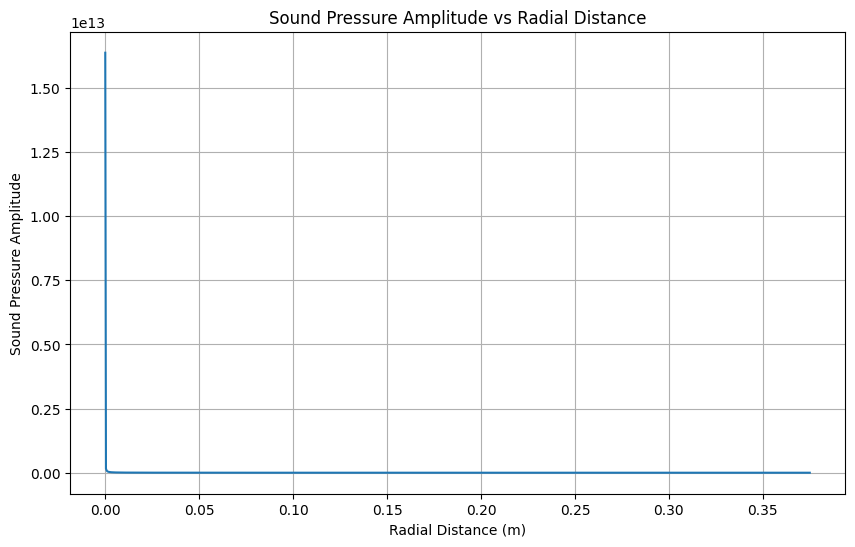

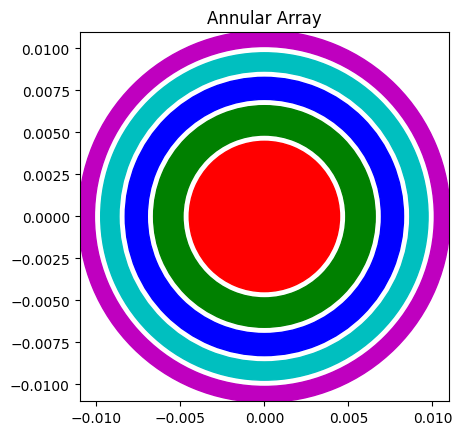

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1
from matplotlib.patches import Wedge

# 定义物理参数
c = 1500  # 声速，单位：m/s
rho0 = 1000  # 介质密度，单位：kg/m^3
f = 4e6  # 频率，单位：Hz
k = 2 * np.pi * f / c  # 波数
u = 1  # 质点振动速度

# 定义环形相控阵参数
m = 5  # 圆环个数
lambda_ = c / f  # 波长
R_max = 0.01  # 中心阵元到最大辐射圆环中心的距离，单位：m
F = 0.02  # 聚焦焦距，单位：m
n = 1  # 圆环间距与波长的倍数系数
delta_d = n * lambda_  # 圆环之间的间距

# 计算等面积圆环的内外径，考虑圆环间距
total_area = np.pi * R_max ** 2
ring_area = total_area / m
a1_list = []
a2_list = []
for i in range(m):
    if i == 0:
        a1 = 0
    else:
        a1 = a2_list[i - 1] + delta_d
    a2 = np.sqrt(a1 ** 2 + ring_area / np.pi)
    a2_list.append(a2)
    a1_list.append(a1)

# 定义声压公式，考虑分母为 0 的情况
def annular_array_pressure(r, theta, phi, t):
    p_total = 0
    epsilon = 1e-10  # 一个极小值，用于避免分母为 0
    for i in range(m):
        a1 = a1_list[i]
        a2 = a2_list[i]
        R_m = (a1+a2)/2 # 简单假设振元到中心阵元距离为圆环外径
        t_m = (np.sqrt(R_max ** 2 + F ** 2) - F - (np.sqrt(R_m ** 2 + F ** 2) - F)) / c
        denominator1 = k * a2 * np.cos(phi) * np.sin(theta)
        denominator2 = k * a1 * np.cos(phi) * np.sin(theta)

        # 计算 term1
        if np.abs(denominator1) < epsilon:
            # 当分母接近 0 时，使用贝塞尔函数极限性质
            term1 = a2 / 2
        else:
            term1 = (a2 ** 2 * j1(k * a2 * np.cos(phi) * np.sin(theta))) / denominator1

        # 计算 term2
        if np.abs(denominator2) < epsilon:
            # 当分母接近 0 时，使用贝塞尔函数极限性质
            term2 = a1 / 2
        else:
            term2 = (a1 ** 2 * j1(k * a1 * np.cos(phi) * np.sin(theta))) / denominator2

        # 校正部分：添加系数 1/2
        p = (1j * k * rho0 * c * u / r) * (term1 - term2) * np.exp(1j * (2 * np.pi * f * t_m - k * r))
        p_total += p
        print(p_total)
    return p_total

# 定义径向距离范围
r_values = np.linspace(delta_d/100, delta_d*1000,1000)

# 固定 theta、phi 和 t 的值
theta = 0  # 修改 theta 为非零值
phi = 0
t = 0

# 计算每个 r 对应的声压幅值
pressure_values = []
for r in r_values:
    pressure = annular_array_pressure(r, theta, phi, t)
    pressure_amplitude = np.abs(pressure)
    pressure_values.append(pressure_amplitude)

# 绘制声压随径向距离的变化曲线
plt.figure(figsize=(10, 6))
plt.plot(r_values, pressure_values)
plt.xlabel('Radial Distance (m)')
plt.ylabel('Sound Pressure Amplitude')
plt.title('Sound Pressure Amplitude vs Radial Distance')
plt.grid(True)
plt.show()

# 定义颜色列表
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# 绘制圆环阵列
fig, ax = plt.subplots()
for i, (a1, a2) in enumerate(zip(a1_list, a2_list)):
    # 使用 Wedge 绘制中间有填充的环形
    ring = Wedge((0, 0), a2, 0, 360, width=(a2 - a1))
    # 从颜色列表中选取颜色进行填充
    color = colors[i % len(colors)]
    ring.set_facecolor(color)
    ring.set_edgecolor(color)
    ax.add_artist(ring)

ax.set_xlim(-R_max * 1.1, R_max * 1.1)
ax.set_ylim(-R_max * 1.1, R_max * 1.1)
ax.set_aspect('equal')
ax.set_title('Annular Array')
plt.show()